# Optymalizacja i kodowanie danych

## Zadanie -  Obwód kwantowy z optymalizacją

- Napisz nowy obwód kwantowy, który zawierać będzie tylko bramkę $R_X$ dla dowolnego parametru $\theta$
- oblicz i uzasadnij, że wartość oczekiwana dla stanu $\ket{\psi} = R_X \, \ket{0}$ 
$$<Z> = cos^2(\theta /2)- sin^2(\theta /2) = cos(\theta)$$


Załóżmy, że nasz problem obliczeniowy sprowadza się do wygenerowania wartości oczekiwanej o wartości 0.5. 

$$
 \textbf{<Z>} = \bra{\psi} \textbf{Z} \ket{\psi} = 0.5
 $$

 

Napisz program znajdujący rozwiązanie - szukający wagę $\theta$ dla naszego obwodu

- Zdefiniuj funkcję kosztu, którą bedziemy minimalizować $(Y - y)^2$
- zainicjuj rozwiązanie $theta=0.01$ i przypisz do tablicy array `np.array(0.01, requires_grad=True)`
- Jako opt wybierz spadek po gradiencie : `opt = qml.GradientDescentOptimizer(stepsize=0.1)`
- uzyj poniższego kodu do wygenerowania pętli obiczeń 

```python

epochs = 100

for epoch in range(epochs):
    theta = opt.step(cost_fn, theta)

    if epoch % 10 == 0:
        print(f"epoka: {epoch}, theta: {theta}, koszt: {cost_fn(theta)}")
```

Wykorzystując tylko elementy pennylane

In [ ]:
import pennylane as qml
from pennylane import numpy as np 

dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def par_c(theta):
    qml.RX(theta, wires=0)
    return qml.expval(qml.PauliZ(0))


def cost_fn(theta):
    return (par_c(theta) - 0.5)**2

theta = np.array(0.01, requires_grad=True)

opt = qml.GradientDescentOptimizer(stepsize=0.1)

epochs = 100

for epoch in range(epochs):
    theta = opt.step(cost_fn, theta)

    if epoch % 10 == 0:
        print(f"epoka: {epoch}, theta: {theta}, koszt: {cost_fn(theta)}")

print(f"Optymalizacja zakonczona dla theta={theta}, koszt: {cost_fn(theta)}")

Możemy też użyć bezpośrednio pytorch


In [1]:
import pennylane as qml
from pennylane import numpy as np 

dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev, interface="torch")
def par_c(theta):
    qml.RX(theta, wires=0)
    return qml.expval(qml.PauliZ(0))



def cost_fn(theta):
    target = 0.5
    return (par_c(theta) - target) ** 2


import torch
from torch.optim import Adam 

theta = torch.tensor(0.01, requires_grad=True)

optimizer = Adam([theta], lr=0.1)
epochs = 100

for epoch in range(epochs):
    optimizer.zero_grad()
    loss = cost_fn(theta)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"epoka: {epoch}, theta: {theta}, koszt: {cost_fn(theta)}")

epoka: 0, theta: 0.1099998876452446, koszt: 0.24399264948886004
epoka: 10, theta: 1.0454959869384766, koszt: 2.169397961785511e-06
epoka: 20, theta: 1.0966185331344604, koszt: 0.0018829460500888265
epoka: 30, theta: 0.9526112079620361, koszt: 0.006329338284936267
epoka: 40, theta: 1.111649513244629, koszt: 0.0032281231974498922
epoka: 50, theta: 1.0076401233673096, koszt: 0.0011463367423114523
epoka: 60, theta: 1.0690317153930664, koszt: 0.00036201344599675586
epoka: 70, theta: 1.0343401432037354, koszt: 0.000123060304852398
epoka: 80, theta: 1.0549986362457275, koszt: 4.584717916214815e-05
epoka: 90, theta: 1.042211651802063, koszt: 1.859027886217772e-05


Jeszcze jeden przykład

- Napisz obwód kwantowy, który zawierać będzie bramkę $R_X$ dla parametru $\theta_1$ oraz $R_Y$ dla parametru $\theta_2$
- oblicz i uzasadnij, że wartość oczekiwana dla stanu $\ket{\psi} = R_Y(\theta_2) R_X(\theta_1) \, \ket{0}$ 

$$<Z>  = \cos(\theta_1) \cos(\theta_2)$$

Mozliwe wartości średniej zawierają się w przedziale $-1$, $1$.

Przyjmij załozenie, ze optymalne rozwiązanie realizowane jest dla wartości oczekiwanej = 0.4 

In [2]:
import pennylane as qml
from pennylane import numpy as np 

dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def par_c(theta):
    qml.RX(theta[0], wires=0)
    qml.RY(theta[1], wires=0)
    return qml.expval(qml.PauliZ(0))


def cost_fn(theta):
    return (par_c(theta) - 0.4)**2

theta = np.array([0.01, 0.02], requires_grad=True)

opt = qml.GradientDescentOptimizer(stepsize=0.1)

epochs = 100

for epoch in range(epochs):
    theta = opt.step(cost_fn, theta)

    if epoch % 10 == 0:
        print(f"epoka: {epoch}, theta: {theta}, koszt: {cost_fn(theta)}")

print(f"Optymalizacja zakonczona dla theta={theta}, koszt: {cost_fn(theta)}")

epoka: 0, theta: [0.01119924 0.02239872], koszt: 0.3596238551650218
epoka: 10, theta: [0.03468299 0.06939827], koszt: 0.35640059384126277
epoka: 20, theta: [0.10485556 0.21069384], koszt: 0.3277736421372642
epoka: 30, theta: [0.26595847 0.55025891], koszt: 0.17843868824086426
epoka: 40, theta: [0.41114867 0.91214351], koszt: 0.02593550926609833
epoka: 50, theta: [0.45600131 1.05610411], koszt: 0.0017612620807984237
epoka: 60, theta: [0.46619699 1.09390217], koszt: 0.00010074458607215528
epoka: 70, theta: [0.4685347  1.10295946], koszt: 5.557697121461739e-06
epoka: 80, theta: [0.469078   1.10508776], koszt: 3.040948516747214e-07
epoka: 90, theta: [0.46920476 1.10558565], koszt: 1.6607272093790385e-08
Optymalizacja zakonczona dla theta=[0.46923296 1.10569646], koszt: 1.2125189676042736e-09


### Zadanie

Celem jest znalezienie najmnieszej wartości własnej dla Hamiltonianu $H = Z_0 Z_1 + Z_0$

Tego typu hamiltoniany opisują układy fizyczne np. systemy spinowe. 

$Z_0 Z_1$ - mozna interpretować jako krawedz miedzy dwoma wierzchołkami. 

$Z_0$ - efekty lokalne wierzchołka 0

In [ ]:
import pennylane as qml
from pennylane import numpy as np 
import random

dev = qml.device("default.qubit", wires=2)

H = qml.PauliZ(0) @ qml.PauliZ(1) + qml.PauliZ(0)

@qml.qnode(dev)
def circuit(params):
    qml.RY(params[0], wires=0)
    qml.RY(params[1], wires=1)
    qml.CNOT(wires=[0,1])
    return qml.expval(H)

def cost_fn(params):
    return circuit(params)

init_param = [random.uniform(0, 2*3.1415) for _ in range(2)]

params = np.array(init_param, requires_grad=True)

opt = qml.GradientDescentOptimizer(stepsize=0.01)

epochs = 500
for epoch in range(epochs):
    params = opt.step(cost_fn, params)

    if epoch % 50 == 0:
        print(f"epoka: {epoch}, theta: {params}, koszt: {cost_fn(params)}")

print(f"Optymalizacja zakonczona dla theta={params}, koszt: {cost_fn(params)}")

## Klasyczne dane

In [3]:
import pennylane as qml
import pennylane.numpy as np


N = 3
wires = range(N)
dev = qml.device('default.qubit', wires)

In [4]:
@qml.qnode(dev)
def basis_encoding(features):
    qml.BasisEmbedding(features, wires)
    return qml.probs()

$$ \ket{111} = \ket{1}\otimes \ket{1} \otimes \ket{1} = [0 0 0 0 0 0 0 1]^T$$

In [5]:
basis_encoding([1,1,1])

array([0., 0., 0., 0., 0., 0., 0., 1.])

In [6]:
basis_encoding(7)

array([0., 0., 0., 0., 0., 0., 0., 1.])

(<Figure size 400x400 with 1 Axes>, <Axes: >)

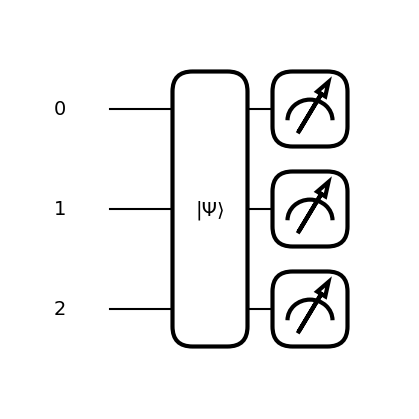

In [7]:
qml.draw_mpl(basis_encoding)([1,1,1])

In [9]:
n_wires = 4 
dev = qml.device('default.qubit', wires= n_wires)

@qml.qnode(dev)
def circ(features):
    for i in range(len(features)):
        if features[i] == 1:
            qml.X(i)
    qml.Barrier()
    qml.Hadamard(1)
    qml.CNOT([1,3])
    return qml.state()

In [10]:
circ([1,0,1,0])

array([0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.70710678+0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

(<Figure size 500x500 with 1 Axes>, <Axes: >)

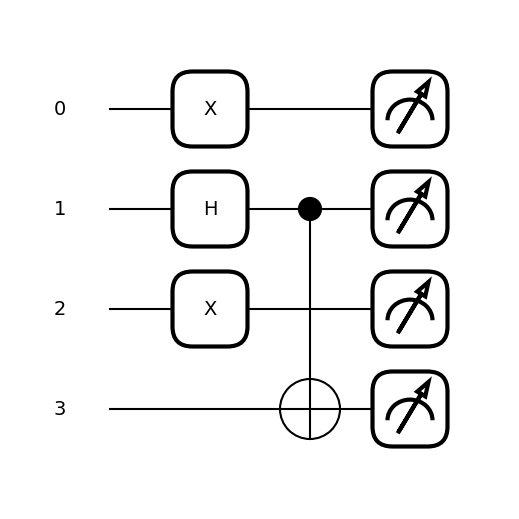

In [11]:
qml.draw_mpl(circ, level='device', scale=0.7)([1,0,1,0])

## Amplitude encoding

In [12]:
import pennylane as qml
N = 3
wires = range(N)

dev = qml.device("default.qubit", wires)

@qml.qnode(dev)
def circuit(features):
    qml.AmplitudeEmbedding(features, wires)
    return qml.state()

In [13]:
circuit([0.625,0.0,0.0,0.0,0.625,0.375,0.25,0.125])

array([0.625+0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j, 0.625+0.j, 0.375+0.j,
       0.25 +0.j, 0.125+0.j])

In [14]:
import pennylane as qml
N = 3
wires = range(N)

dev = qml.device("default.qubit", wires)

@qml.qnode(dev)
def circuit(f=None):
    qml.AmplitudeEmbedding(features=f, wires=dev.wires, normalize=True, pad_with=0)
    return qml.expval(qml.PauliZ(0)), qml.state()

In [15]:
vect = [0.1, -0.3, 0.5, 0.4, 0.2]

In [16]:
norm = np.linalg.norm(vect)
norm_vec = np.round([i / norm for i in vect], 4)
print(f"Vec: {vect}, Norm{norm_vec}")

Vec: [0.1, -0.3, 0.5, 0.4, 0.2], Norm[ 0.1348 -0.4045  0.6742  0.5394  0.2697]


In [17]:
res, state = circuit(f=norm_vec)
res2, state2 = circuit(f=vect)

In [18]:
state.real, state2.real

(array([ 0.13479815, -0.40449446,  0.67419077,  0.53939262,  0.26969631,
         0.        ,  0.        ,  0.        ]),
 array([ 0.13483997, -0.40451992,  0.67419986,  0.53935989,  0.26967994,
         0.        ,  0.        ,  0.        ]))

(<Figure size 400x400 with 1 Axes>, <Axes: >)

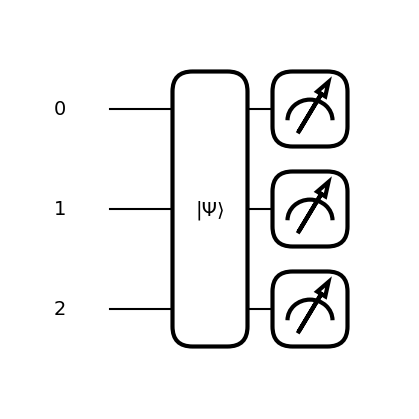

In [19]:
qml.draw_mpl(circuit)(norm_vec)

In [22]:
import pennylane as qml
import pennylane.numpy as np
from sklearn.preprocessing import normalize
from sklearn.datasets import load_wine

data = load_wine()

X = data.data
y = data.target

In [27]:
X[:3]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03]])

In [28]:
def prepare_ampl(x, target_len = 16):
    padded = np.pad(x, (0, target_len - len(x)), mode="constant")
    normed = padded / np.linalg.norm(padded)
    return np.array(normed, requires_grad=True)

In [29]:
x0 = X[0]
features = prepare_ampl(x0)

In [30]:
features

tensor([1.32644724e-02, 1.59397384e-03, 2.26512072e-03, 1.45415157e-02,
        1.18382852e-01, 2.61001565e-03, 2.85237424e-03, 2.61001565e-04,
        2.13461994e-03, 5.25731723e-03, 9.69434383e-04, 3.65402190e-03,
        9.92738094e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00], requires_grad=True)

In [31]:
n_qubits = 4
dev = qml.device('default.qubit', wires = n_qubits)

@qml.qnode(dev)
def amplitude_circ(x):
    qml.AmplitudeEmbedding(features=x, wires=range(n_qubits), normalize=False)
    return qml.state()

In [32]:
state = amplitude_circ(features)

In [33]:
state

tensor([1.32644724e-02+0.j, 1.59397384e-03+0.j, 2.26512072e-03+0.j,
        1.45415157e-02+0.j, 1.18382852e-01+0.j, 2.61001565e-03+0.j,
        2.85237424e-03+0.j, 2.61001565e-04+0.j, 2.13461994e-03+0.j,
        5.25731723e-03+0.j, 9.69434383e-04+0.j, 3.65402190e-03+0.j,
        9.92738094e-01+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
        0.00000000e+00+0.j], requires_grad=True)

In [35]:
@qml.qnode(dev)
def amp_circ(x):
    qml.AmplitudeEmbedding(features=x, wires=range(n_qubits), normalize=True, pad_with=0)
    return qml.state()

In [36]:
state2 = amp_circ(X[0])

In [37]:
state2

array([1.32644724e-02+0.j, 1.59397384e-03+0.j, 2.26512072e-03+0.j,
       1.45415157e-02+0.j, 1.18382852e-01+0.j, 2.61001565e-03+0.j,
       2.85237424e-03+0.j, 2.61001565e-04+0.j, 2.13461994e-03+0.j,
       5.25731723e-03+0.j, 9.69434383e-04+0.j, 3.65402190e-03+0.j,
       9.92738094e-01+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
       0.00000000e+00+0.j])

## Angle encoding

$$ x \to R_k(x) \ket{0} = e^{-i\,x \frac{\sigma_k}{2}} \ket{0} $$

In [38]:
import pennylane as qml
import pennylane.numpy as np

features= [np.pi/3, np.pi/4]
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def circ(features):
    qml.AngleEmbedding(features=features, rotation='Y', wires=range(2))
    return qml.probs(wires=[0,1])

In [39]:
np.round(circ(features), 3)

tensor([0.64 , 0.11 , 0.213, 0.037], requires_grad=True)

(<Figure size 400x300 with 1 Axes>, <Axes: >)

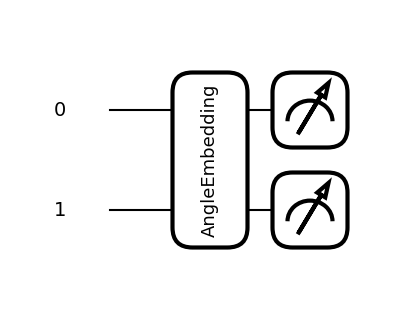

In [40]:
qml.draw_mpl(circ)(features)

In [41]:
import pennylane as qml
import pennylane.numpy as np
from sklearn.preprocessing import normalize
from sklearn.datasets import load_wine

data = load_wine()

X = data.data
y = data.target

In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, np.pi))
X_saled = scaler.fit_transform(X)

In [43]:
dev = qml.device('default.qubit', wires=13)

@qml.qnode(dev)
def emb(x):
    qml.AngleEmbedding(x, wires=range(len(x)), rotation='Y')
    return qml.expval(qml.PauliZ(0))

In [44]:
emb(X_saled[0])

np.float64(-0.8794737512064895)

In [46]:
@qml.qnode(dev)
def emb(x):
    qml.AngleEmbedding(x, wires=range(len(x)), rotation='Y')
    return [qml.expval(qml.PauliZ(i)) for i in range(len(x))]

In [47]:
emb(X_saled[0])

[np.float64(-0.8794737512064895),
 np.float64(0.8240675736145868),
 np.float64(-0.2248601123708277),
 np.float64(0.6897237772781044),
 np.float64(-0.3668542188130566),
 np.float64(-0.39017706326055457),
 np.float64(-0.2298992328822939),
 np.float64(0.6300878435817112),
 np.float64(-0.28820944852718955),
 np.float64(0.3913341989876884),
 np.float64(0.14001614496862924),
 np.float64(-0.9957653484788057),
 np.float64(-0.1915177132878786)]